In [268]:
# importing the libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')


In [269]:
# read data from excel
bike_df = pd.read_csv("SeoulBikeData.csv",encoding='cp1252')

In [270]:
print("Info Details")
bike_df.info()

Info Details
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non

In [271]:
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [272]:
#checking missing values
bike_df.isna().sum()
bike_df.isnull().sum()


Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [273]:
#checking duplicate values
print('Duplicate values : ', len(bike_df[bike_df.duplicated()]))

Duplicate values :  0


# EDA

#1. Dependency of dependent variable with independent variables

<AxesSubplot:xlabel='Holiday', ylabel='Rented Bike Count'>

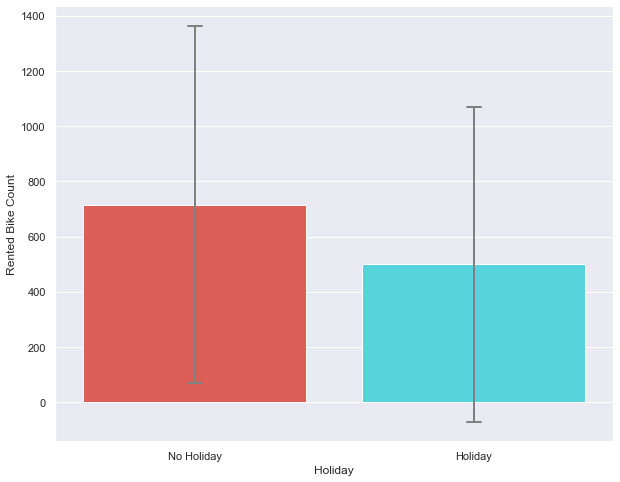

In [274]:
sb.barplot(x = 'Holiday', y = 'Rented Bike Count', data = bike_df,
            palette = 'hls',
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'    )

<AxesSubplot:xlabel='Functioning Day', ylabel='Rented Bike Count'>

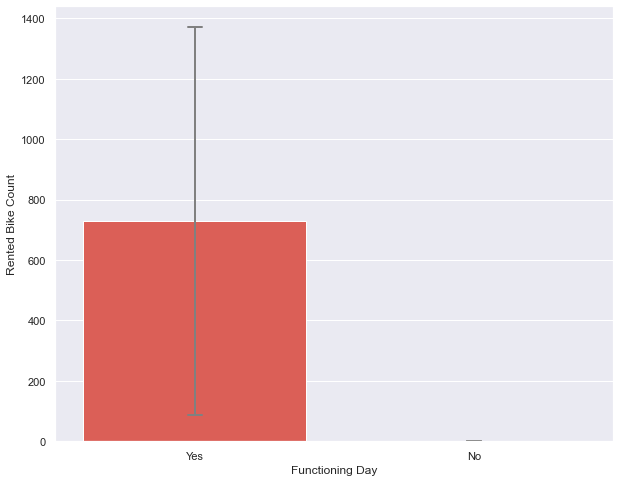

In [275]:
sb.barplot(x = 'Functioning Day', y = 'Rented Bike Count', data = bike_df,
            palette = 'hls',
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'    )

<AxesSubplot:xlabel='Seasons', ylabel='Rented Bike Count'>

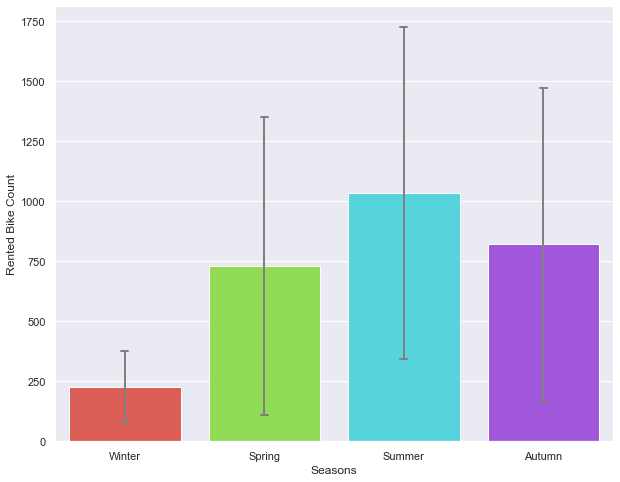

In [277]:
sb.barplot(x = 'Seasons', y = 'Rented Bike Count', data = bike_df,
            palette = 'hls',
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'    )

<AxesSubplot:xlabel='Rainfall(mm)'>

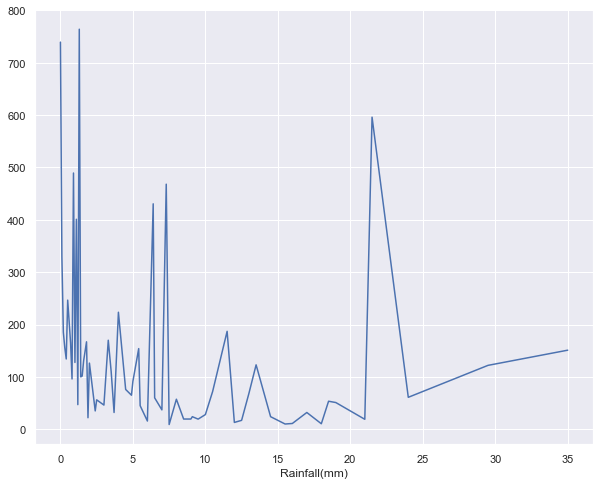

In [278]:
#print the plot to find the relationship between "Rented Bike Count" and "Rainfall(mm)" 
bike_df.groupby('Rainfall(mm)').mean()['Rented Bike Count'].plot()

<AxesSubplot:xlabel='Wind speed (m/s)'>

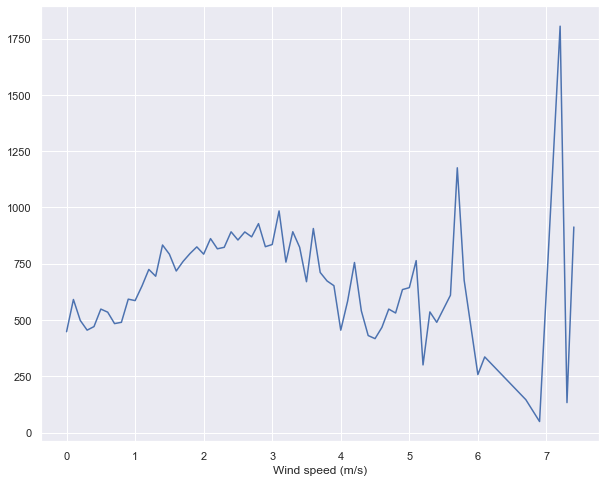

In [279]:
#print the plot to find the relationship between "Rented Bike Count" and "Wind speed (m/s)" 
bike_df.groupby('Wind speed (m/s)').mean()['Rented Bike Count'].plot()

<AxesSubplot:xlabel='Temperature(°C)'>

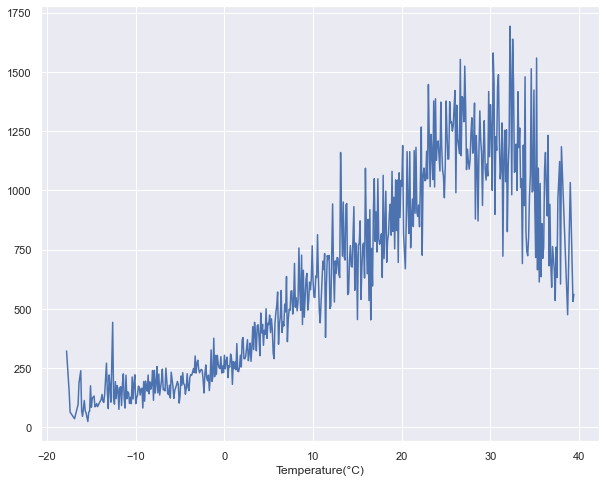

In [280]:
#print the plot to find the relationship between "Rented Bike Count" and "Temperature(°C)" 
bike_df.groupby('Temperature(°C)').mean()['Rented Bike Count'].plot()

<AxesSubplot:xlabel='Snowfall (cm)'>

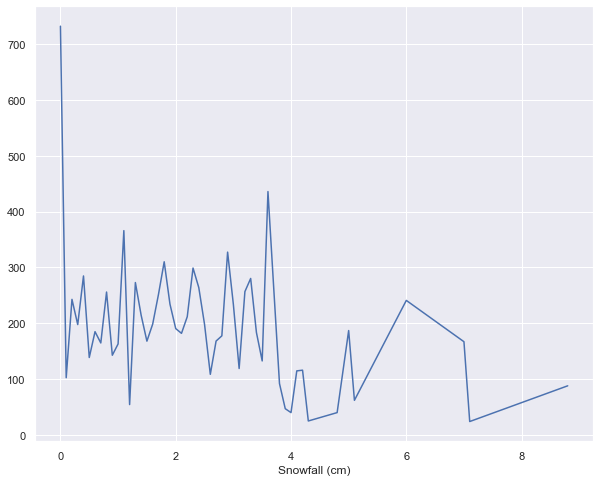

In [281]:
#print the plot to find the relationship between "Rented Bike Count" and "Snowfall (cm)" 
bike_df.groupby('Snowfall (cm)').mean()['Rented Bike Count'].plot()

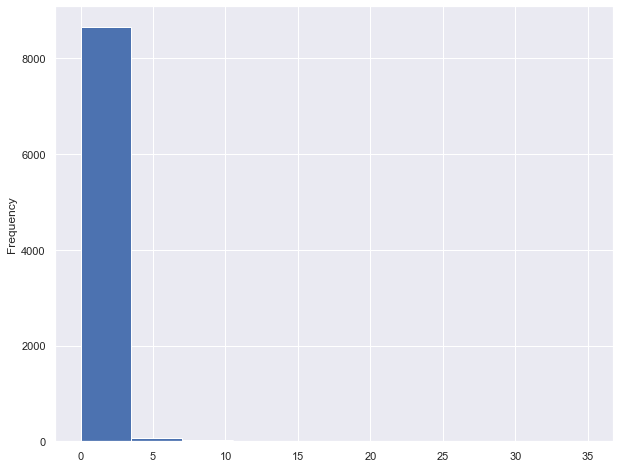

In [282]:
bike_df['Rainfall(mm)'].plot(kind='hist')
plt.show()

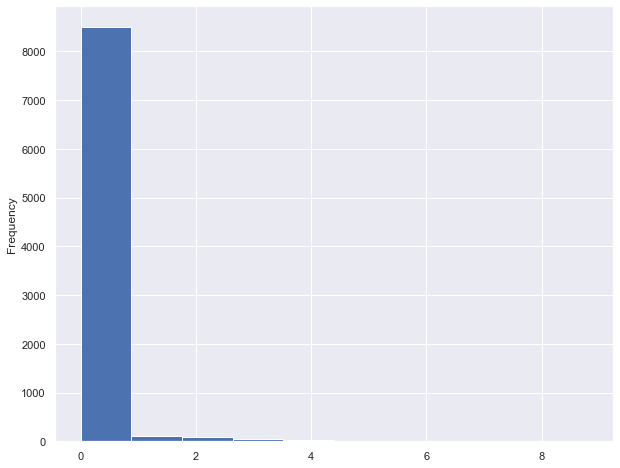

In [283]:
bike_df['Snowfall (cm)'].plot(kind='hist')
plt.show()

#2. Check correlation between the variables

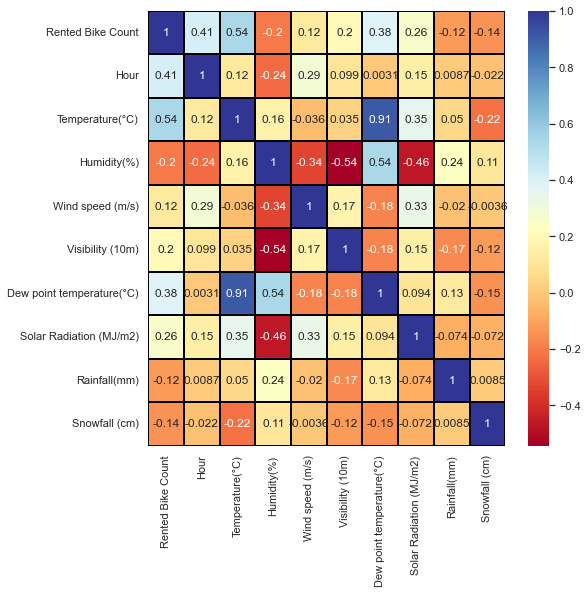

In [284]:
plt.figure(figsize=(8,8))
sb.set_style("whitegrid", {"axes.facecolor": ".0"})
plot_kws={"s": 1}
sb.heatmap(bike_df.corr(),
            cmap='RdYlBu',
            annot=True,
            linewidths=0.2, 
            linecolor='black').set_facecolor('green')

Dew Point Temperature and Temperature show strong positive correlation of 0.91. 
So , we can plan to drop the Dew Point Temperature as the 2 variable will have similar variations

In [285]:
print('The correlation between variables: ', bike_df.corr())

The correlation between variables:                             Rented Bike Count      Hour  Temperature(°C)  \
Rented Bike Count                   1.000000  0.410257         0.538558   
Hour                                0.410257  1.000000         0.124114   
Temperature(°C)                     0.538558  0.124114         1.000000   
Humidity(%)                        -0.199780 -0.241644         0.159371   
Wind speed (m/s)                    0.121108  0.285197        -0.036252   
Visibility (10m)                    0.199280  0.098753         0.034794   
Dew point temperature(°C)           0.379788  0.003054         0.912798   
Solar Radiation (MJ/m2)             0.261837  0.145131         0.353505   
Rainfall(mm)                       -0.123074  0.008715         0.050282   
Snowfall (cm)                      -0.141804 -0.021516        -0.218405   

                           Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
Rented Bike Count            -0.199780          0.121108    

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Temperature(°C)', ylabel='Dew point temperature(°C)'>

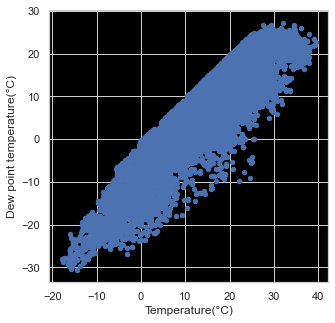

In [286]:
bike_df.plot(kind = 'scatter',x = 'Temperature(°C)', y = 'Dew point temperature(°C)', figsize = (5,5))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Humidity(%)', ylabel='Dew point temperature(°C)'>

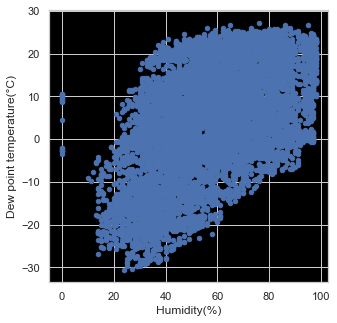

In [287]:
bike_df.plot(kind = 'scatter',x = 'Humidity(%)', y = 'Dew point temperature(°C)', figsize = (5,5))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Temperature(°C)', ylabel='Rented Bike Count'>

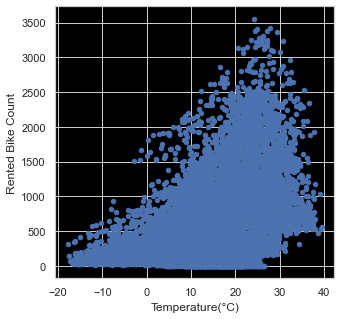

In [288]:
bike_df.plot(kind = 'scatter',y = 'Rented Bike Count', x = 'Temperature(°C)', figsize = (5,5))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Humidity(%)', ylabel='Visibility (10m)'>

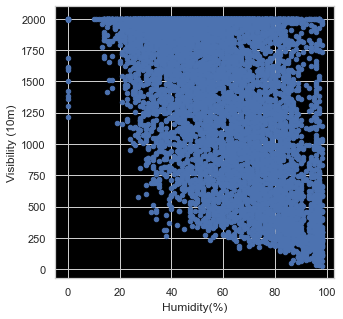

In [289]:
bike_df.plot(kind = 'scatter',x = 'Humidity(%)', y = 'Visibility (10m)', figsize = (5,5))

In [290]:
#bike_df.describe(include='all').T
bike_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


# Pre Processing Data

#1. Split Date field into Month, Date and Year


In [291]:
# Add few variables (split the date to month, year,weekday and day)
bike_df['Date']=pd.to_datetime(bike_df['Date'])
from datetime import datetime
import datetime as dt

bike_df['Year']=bike_df['Date'].dt.year
bike_df['Month']=bike_df['Date'].dt.month
bike_df['Day']=bike_df['Date'].dt.day
bike_df['DayName']=bike_df['Date'].dt.day_name()
bike_df['Weekday'] = bike_df['DayName'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
bike_df=bike_df.drop(columns=['Date','DayName','Year'],axis=1)

In [292]:
bike_df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Day,Weekday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,0


In [293]:
bike_df['Weekday'].value_counts()

0    6216
1    2544
Name: Weekday, dtype: int64

In [294]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Month                      8760 non-null   int64

#2. Create Dummy Variables

In [295]:
#Holiday, Functioning Day and Seasons need to have dummy variables  (object DType)
bike_df = pd.get_dummies(bike_df, columns = ['Seasons',	'Holiday',	'Functioning Day'])
bike_df

#converting the categorical variables to numerical (float) types
#bike_df['Holiday'] =  bike_df['Holiday'].astype(int)
#bike_df['Functioning Day'] =  bike_df['Functioning Day'].astype(int)
#bike_df['Seasons'] =  bike_df['Seasons'].astype(int)
  
#bike_df['Holiday'] = bike_df['Holiday'].apply(lambda x : 1 if x=='Holiday' else 0 )
#bike_df['Functioning Day'] = bike_df['Functioning Day'].apply(lambda x : 1 if x=='Yes' else 0 )

# Defining all the conditions inside a function
#def condition(x):
#    if x == 'Autumn':
#        return 1
#    elif x == 'Spring':
#        return 2
#    elif x == 'Summer':
#        return 3
#    else:
#        return 4
 
# Applying the conditions
#bike_df['Seasons'] = bike_df['Seasons'].apply(condition)
#bike_df['Seasons'] = bike_df['Seasons'].apply(lambda x : 1 if x=='Autumn' elif x=='Spring' 2 elif x =='Summer' 3 else 4)
#bike_df 

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,Day,Weekday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,...,12,0,0,0,0,1,0,1,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,...,12,0,0,0,0,1,0,1,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,...,12,0,0,0,0,1,0,1,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,...,12,0,0,0,0,1,0,1,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,...,12,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,...,30,0,1,0,0,0,0,1,0,1
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,...,30,0,1,0,0,0,0,1,0,1
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,...,30,0,1,0,0,0,0,1,0,1
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,...,30,0,1,0,0,0,0,1,0,1


In [298]:
#sb.pairplot(bike_df_norm)

EDA on the new features

<AxesSubplot:xlabel='Month', ylabel='Rented Bike Count'>

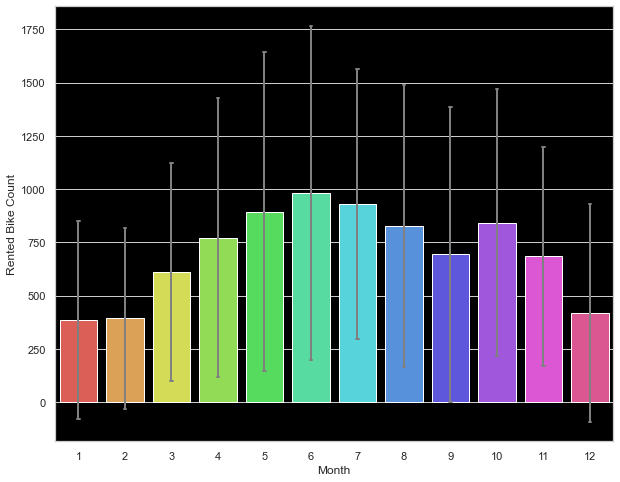

In [299]:
# EDA
sb.barplot(x = 'Month', y = 'Rented Bike Count', data = bike_df,
            palette = 'hls',
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'    )


<AxesSubplot:xlabel='Weekday', ylabel='Rented Bike Count'>

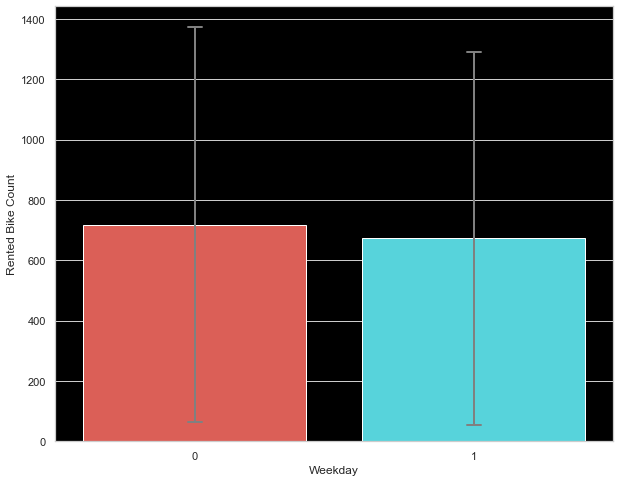

In [300]:
sb.barplot(x = 'Weekday', y = 'Rented Bike Count', data = bike_df,
            palette = 'hls',
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'    )


<AxesSubplot:xlabel='Hour', ylabel='Rented Bike Count'>

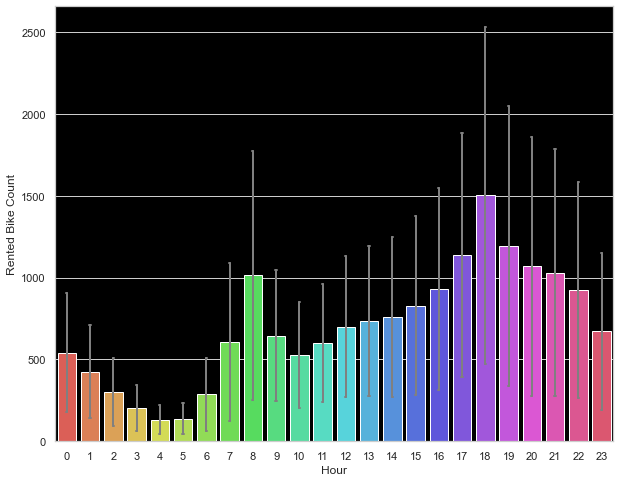

In [301]:
sb.barplot(x = 'Hour', y = 'Rented Bike Count', data = bike_df,
            palette = 'hls',
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'    )

#3. Normalise the data

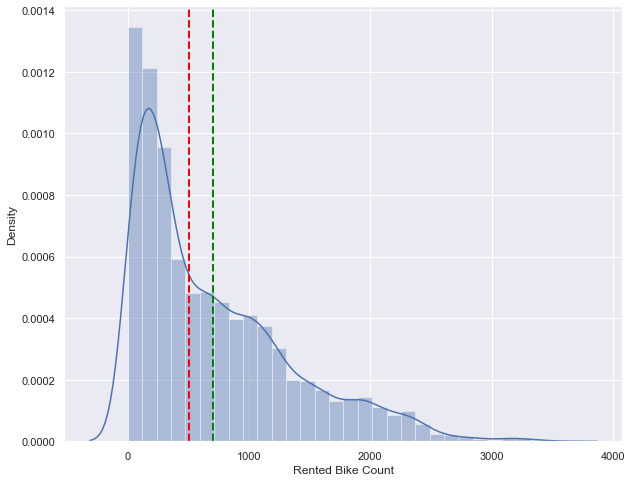

In [302]:
#1 . Check the distribution plot of y variable
sb.set(rc={'figure.figsize':(10,8)})
gr = sb.distplot(bike_df['Rented Bike Count'], bins=30)
gr.axvline(bike_df['Rented Bike Count'].mean(), color='green', linestyle='dashed', linewidth=2)
gr.axvline(bike_df['Rented Bike Count'].median(), color='red', linestyle='dashed', linewidth=2)
plt.show()

Since y variable is skewed, we will normalise the train df

In [303]:

print("------Data Standardization------")
sc = StandardScaler()
bike_df_norm = sc.fit_transform(bike_df)
bike_df_norm=pd.DataFrame(bike_df_norm)

# Pairwise Correlation for columns
bike_df_norm.corr()
bike_df_norm.columns = bike_df.columns

print("bike_df_norm->")
print(bike_df_norm)

------Data Standardization------
bike_df_norm->
      Rented Bike Count      Hour  Temperature(°C)  Humidity(%)  \
0             -0.698650 -1.661325        -1.513957    -1.042483   
1             -0.776175 -1.516862        -1.539074    -0.993370   
2             -0.824240 -1.372399        -1.580936    -0.944257   
3             -0.926571 -1.227936        -1.597680    -0.895144   
4             -0.971535 -1.083473        -1.580936    -1.091596   
...                 ...       ...              ...          ...   
8755           0.462661  1.083473        -0.726961    -1.189822   
8756           0.092095  1.227936        -0.793939    -1.042483   
8757          -0.016438  1.372399        -0.860918    -0.944257   
8758           0.011470  1.516862        -0.902779    -0.846031   
8759          -0.186991  1.661325        -0.919524    -0.747806   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0             0.458476          0.925871                  -1.659605   
1    

# COST FUNCTION AND GRADIENT DESCENT



In [304]:
def cost_function(x,y,beta):
    # cost_function(X,y,beta):cost of using beta as parameter for LR to fit the data points in X and y
    m = len(x)
    J = np.sum((x.dot(beta)-y)**2)/(2*m)
    return J


#cost1 = cost_function(X,y,beta)
#print(cost1)

In [305]:
iterations = 2000 #epoch
alpha = 0.005 #learning rate

def gradient_descent(X,y,beta, alpha, iterations):
    # This function updates beta by taking the iterations gradient steps with learning rate
    cost_old = [0] * iterations
    m = len(x)
    for i in range(iterations):
        y_hat = X.dot(beta)
        remaining = y_hat - y
        gradient = X.T.dot(remaining)/m
        beta = beta - (alpha * gradient)
        cost = cost_function(X,y,beta)
        cost_old[i] = cost
    return beta, cost_old

In [ ]:
sb.pairplot(bike_df_norm)

# DATA SPLIT AND MODEL TRAINING FOR LR

In [306]:
# Split the features in X and Y
x = bike_df_norm.drop(columns=['Rented Bike Count'], axis=1)
y = bike_df_norm['Rented Bike Count']

In [307]:
#Set bias intercept 
x['intercept'] =1

In [308]:
#Rearrange the index 'intercept'
x = x.reindex(['intercept','Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Month',
       'Day', 'Weekday', 'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_Holiday', 'Holiday_No Holiday',
       'Functioning Day_No', 'Functioning Day_Yes'], axis=1)

In [309]:
#Create test and train data
from sklearn.model_selection import train_test_split
#split the data by percentage
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)

(6132, 21)
(2628, 21)


Since y variable is skewed, we will normalise the train df

In [310]:
# call gradient_descent function to fit the parameters
# Train Data
beta = np.zeros((X_train.shape[1]))
beta
#beta = np.array([0,0])
(beta_value_new, cost_history) = gradient_descent(X_train, y_train, beta, alpha, iterations)
print(beta_value_new)
print(cost_history)

intercept                    0.007192
Hour                         0.308761
Temperature(°C)              0.293184
Humidity(%)                 -0.265913
Wind speed (m/s)             0.024252
Visibility (10m)             0.046082
Dew point temperature(°C)    0.156765
Solar Radiation (MJ/m2)     -0.067071
Rainfall(mm)                -0.105022
Snowfall (cm)                0.012802
Month                        0.013267
Day                          0.004077
Weekday                     -0.026621
Seasons_Autumn               0.101035
Seasons_Spring               0.029909
Seasons_Summer               0.024818
Seasons_Winter              -0.156541
Holiday_Holiday             -0.022317
Holiday_No Holiday           0.022317
Functioning Day_No          -0.129734
Functioning Day_Yes          0.129734
dtype: float64
[0.49977652272503875, 0.4956263588202533, 0.49155147915854286, 0.48755039078295803, 0.48362163199122116, 0.4797637716571305, 0.4759754085670784, 0.47225517077134005, 0.4686017149497999, 0

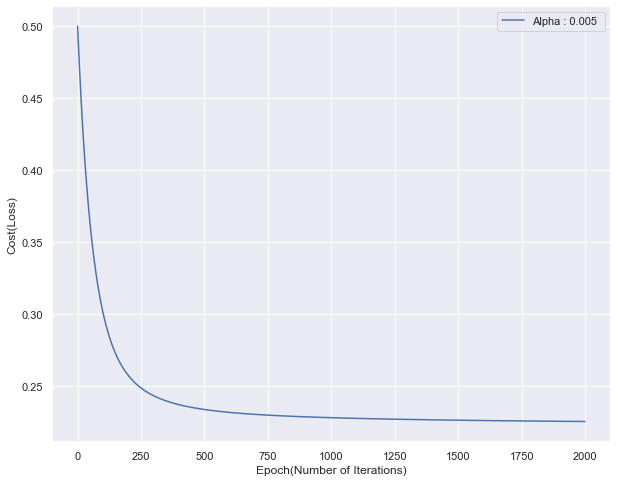

Epoch = 2000
Learning Rate(Alpha) = 0.005
Lowest cost = 0.22574775264085498
-------------------------------------------------------------
Cost after 2000 iterations = 0.22574775264085498


In [311]:
#plotting the best fit line
#best_fit_line_x = np.linspace(0,500,500)
#best_fit_line_y = [beta[1]+beta[0]*i for i in best_fit_line_x]

#COST VS EPOCH PLOT
# Cost/Loss Plot per iteration
plt.plot(cost_history)
plt.xlabel("Epoch(Number of Iterations)")
plt.ylabel("Cost(Loss)")
plt.legend(['Alpha : 0.005 '])
plt.show()
print(f'Epoch = {iterations}')
print(f'Learning Rate(Alpha) = {alpha}')
print(f'Lowest cost = {str(np.min(cost_history))}')
print('-------------------------------------------------------------')
print(f'Cost after {iterations} iterations = {str(cost_history[-1])}')


PREDICT OUTPUT FOR TEST DATA

In [312]:
# Predict Output for Test Data
y_predicted= np.dot(X_test, beta_value_new)
print("Predicted Y:-")
print(y_predicted)

Predicted Y:-
[-0.42596465  0.04456041 -0.31988644 ... -0.39539022 -0.88179486
 -0.00447929]


EVALUATE TRAINING PERFORMANCE

In [313]:
# Evaluation Metrics - Calculation of Mean Absolute Error(MAE), Mean Squared Error (MSE), Root Mean Square Error(RMSE), R2 Score for Training
y_pred_train = np.dot(X_train, beta_value_new)
print("------Training Performance Evaluation-------")
print("Mean Absolute Error(MAE)-",mean_absolute_error(y_train,y_pred_train))
print("Mean Squared Error(MSE)-",mean_squared_error(y_train,y_pred_train))
print("Root Mean Square Error(RMSE)-",np.sqrt(mean_squared_error(y_train,y_pred_train)))
print("R2-",r2_score(y_train,y_pred_train))

------Training Performance Evaluation-------
Mean Absolute Error(MAE)- 0.5030083265175105
Mean Squared Error(MSE)- 0.45149550528170995
Root Mean Square Error(RMSE)- 0.6719341524894459
R2- 0.5520395041261104


EVALUATE TESTING PERFORMANCE

In [314]:
# Evaluation Metrics - Calculation of Mean Absolute Error(MAE), Mean Squared Error (MSE), Root Mean Square Error(RMSE), R2 Score for Testing
print("------Testing Performance Evaluation-------")
print("Mean Absolute Error (MAE)-",mean_absolute_error(y_test,y_predicted))
print("Mean Square Error (MSE)-",mean_squared_error(y_test,y_predicted))
print("Root Mean Square Error(RMSE)-",np.sqrt(mean_squared_error(y_test,y_predicted)))
print("R2-",r2_score(y_test,y_predicted))

------Testing Performance Evaluation-------
Mean Absolute Error (MAE)- 0.5040890255544321
Mean Square Error (MSE)- 0.4490671494531408
Root Mean Square Error(RMSE)- 0.6701247267883351
R2- 0.5420893930113695


In [307]:
X_train.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,Day,Weekday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
5316,0.075608,0.937961,1.080838,-0.886376,0.919427,1.254295,0.167540,-0.125889,-0.173307,1.003852,-0.983195,1.573463,-0.578810,-0.581069,1.728152,-0.570776,-0.225192,0.225192,-0.182652,0.182652
5845,0.220175,2.089557,-0.983896,0.552233,0.702404,1.307794,2.833477,-0.125889,-0.173307,-1.607659,-0.869525,-0.635437,-0.578810,-0.581069,1.728152,-0.570776,-0.225192,0.225192,-0.182652,0.182652
3586,-0.213527,0.387198,-1.131377,0.072697,0.212459,-0.167253,1.929576,-0.125889,-0.173307,-0.737155,1.517549,1.573463,-0.578810,1.720685,-0.578558,-0.570776,-0.225192,0.225192,-0.182652,0.182652
3054,-0.791796,-0.931296,-0.000689,1.990843,-0.413949,-0.732814,-0.656268,-0.125889,-0.173307,0.133349,-1.324206,-0.635437,-0.578810,1.720685,-0.578558,-0.570776,-0.225192,0.225192,-0.182652,0.182652
6805,0.220175,1.188308,-0.983896,-0.023210,0.919427,0.574092,2.272829,-0.125889,-0.173307,1.003852,-0.755855,-0.635437,1.727402,-0.581069,-0.578558,-0.570776,-0.225192,0.225192,-0.182652,0.182652


# EXPERIMENTATION

#1. Change Learning Rate

In [315]:
alpha = 0.5
(beta_value_new_alpha1, cost_history_alpha1)= gradient_descent(X_train, y_train, beta, alpha, iterations)
alpha = 0.05
(beta_value_new_alpha2, cost_history_alpha2) = gradient_descent(X_train, y_train, beta, alpha, iterations)
alpha = 0.001
(beta_value_new_alpha3, cost_history_alpha3)= gradient_descent(X_train, y_train, beta, alpha, iterations)
alpha = 0.025
(beta_value_new_alpha4, cost_history_alpha4)= gradient_descent(X_train, y_train, beta, alpha, iterations)
alpha = 0.00005
(beta_value_new_alpha5, cost_history_alpha5) = gradient_descent(X_train, y_train, beta, alpha, iterations)
alpha = 0.000005
(beta_value_new_alpha6, cost_history_alpha6) = gradient_descent(X_train, y_train, beta, alpha, iterations)

#print(beta_value_new)
#print(cost_history)

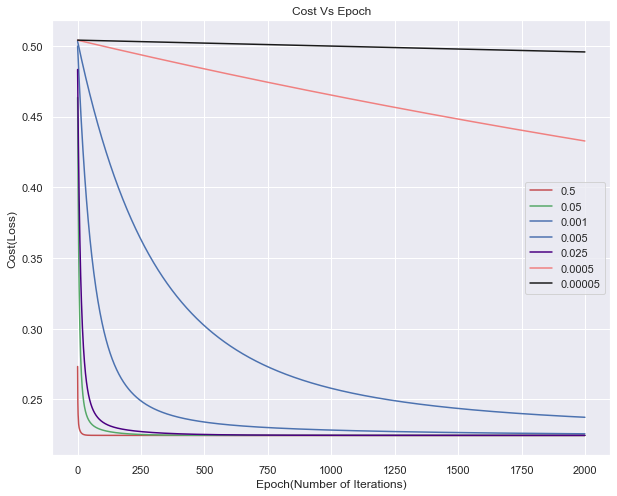

Epoch = 2000
Learning Rate(Alpha) = 5e-06
Lowest cost = 0.22574775264085498
-------------------------------------------------------------
Cost after 2000 iterations = 0.22574775264085498


In [316]:
#COST VS EPOCH PLOT
# Cost/Loss Plot per iteration
# Plotting both the curves simultaneously
plt.plot(cost_history_alpha1, color='r', label='0.5')
plt.plot(cost_history_alpha2, color='g', label='0.05')
plt.plot(cost_history_alpha3, color='b', label='0.001')
plt.plot(cost_history, color='b', label='0.005')
plt.plot(cost_history_alpha4, color='#4b0082', label='0.025')
plt.plot(cost_history_alpha5, color='lightcoral', label='0.0005')
plt.plot(cost_history_alpha6, color='k', label='0.00005')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Epoch(Number of Iterations)")
plt.ylabel("Cost(Loss)")
plt.title("Cost Vs Epoch")

# Adding legend, which helps us recognize the curve according to it's color
plt.legend()

# To load the display window
plt.show()

print(f'Epoch = {iterations}')
print(f'Learning Rate(Alpha) = {alpha}')
print(f'Lowest cost = {str(np.min(cost_history))}')
print('-------------------------------------------------------------')
print(f'Cost after {iterations} iterations = {str(cost_history[-1])}')




#2. Threshold For Convergence

In [318]:
# We are checking max iterations at given threshold
# (Jn - Jn+1) / Jn * 100 
alpha = 0.01 #learning rate

def gradient_descent_tolerance(X,y,beta, alpha,tolerance):
    # This function checks the number of iterations till the threshold
    iterations = 0
    cost_old = [] 
    m = len(x)
    while True:
        iterations +=1
        y_hat = X.dot(beta)
        remaining = y_hat - y
        gradient = X.T.dot(remaining)/m
        diff =  - (alpha * gradient)
        beta = beta + diff
        cost_old.append(np.sum((X.dot(beta)-y)**2)/(2*m))
        if len(cost_old) > 1:
            # 2nd - 1st
            cost_percent = ((cost_old[-2] - cost_old[-1]) / cost_old[-2]) * 100
            if cost_percent <= tolerance:
                break
    return beta, iterations


In [319]:
train_errors = []
test_errors = []
tolerances = [0.0001, 0.001,0.005,0.05,0.02, 0.01, 0.1, 1, 10]
for tolerance in tolerances:
    (beta_value_tolerance_train, iterations_tolerance_train) = gradient_descent_tolerance(X_train, y_train, beta_value_new, alpha,tolerance)
    train_error = cost_function(X_train,y_train,beta_value_tolerance_train ) 
    test_error = cost_function(X_test,y_test,beta_value_tolerance_train )  
    print(f'The Training Error is = {train_error}')
    print(f'The Test Error is = {test_error}')
    print(f'No of Iterations used = {iterations_tolerance_train}')
    print(f'Tolerance =  {tolerance}')
    train_errors.append(train_error)
    test_errors.append(test_error)
#print(beta_value_tolerance_train)
#print(beta_value_tolerance_train)

The Training Error is = 0.22475879258623224
The Test Error is = 0.22369053518600937
No of Iterations used = 1063
Tolerance =  0.0001
The Training Error is = 0.22563561673844693
The Test Error is = 0.22442602720815144
No of Iterations used = 47
Tolerance =  0.001
The Training Error is = 0.22574271663603196
The Test Error is = 0.22452872425812723
No of Iterations used = 2
Tolerance =  0.005
The Training Error is = 0.22574271663603196
The Test Error is = 0.22452872425812723
No of Iterations used = 2
Tolerance =  0.05
The Training Error is = 0.22574271663603196
The Test Error is = 0.22452872425812723
No of Iterations used = 2
Tolerance =  0.02
The Training Error is = 0.22574271663603196
The Test Error is = 0.22452872425812723
No of Iterations used = 2
Tolerance =  0.01
The Training Error is = 0.22574271663603196
The Test Error is = 0.22452872425812723
No of Iterations used = 2
Tolerance =  0.1
The Training Error is = 0.22574271663603196
The Test Error is = 0.22452872425812723
No of Iterati

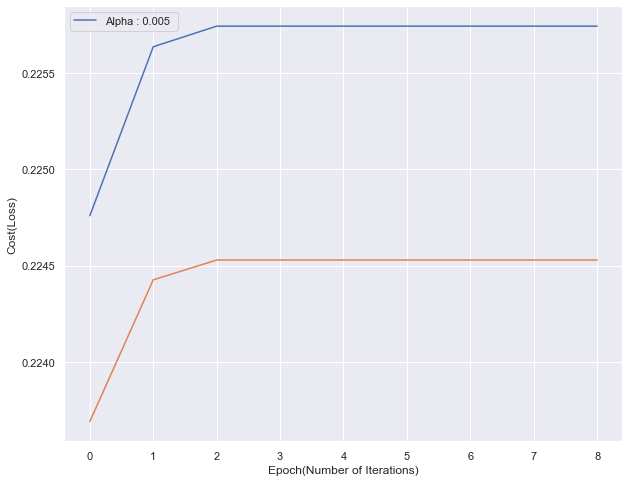

Epoch = 2000
Learning Rate(Alpha) = 0.01
Lowest cost = 0.22574775264085498
-------------------------------------------------------------
Cost after 2000 iterations = 0.22574775264085498


In [320]:
#COST VS EPOCH PLOT
# Cost/Loss Plot per iteration
plt.plot(train_errors)
plt.plot(test_errors)
plt.xlabel("Epoch(Number of Iterations)")
plt.ylabel("Cost(Loss)")
plt.legend(['Alpha : 0.005 '])
plt.show()
print(f'Epoch = {iterations}')
print(f'Learning Rate(Alpha) = {alpha}')
print(f'Lowest cost = {str(np.min(cost_history))}')
print('-------------------------------------------------------------')
print(f'Cost after {iterations} iterations = {str(cost_history[-1])}')

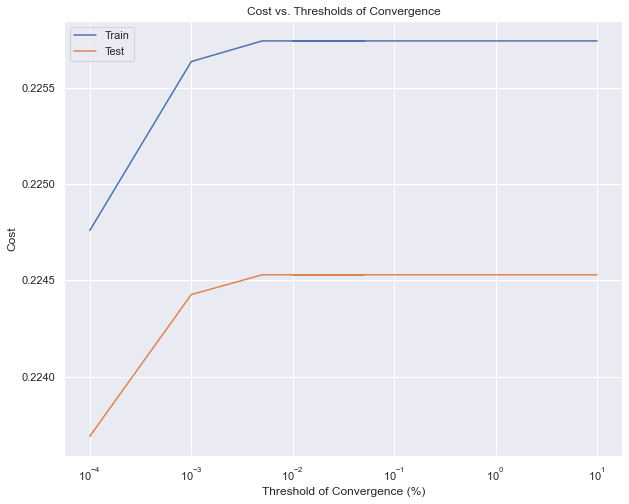

In [321]:

thresholds = [0.0001, 0.001,0.005,0.05,0.02, 0.01, 0.1, 1, 10]
plt.plot(thresholds, train_errors, label = "Train")
plt.plot(thresholds, test_errors, label = "Test")
plt.xscale('log')
plt.xlabel("Threshold of Convergence (%)")
plt.ylabel("Cost")
plt.title("Cost vs. Thresholds of Convergence")
plt.legend()
plt.show()



#3. Running model with 8 random features

In [322]:
# Random Variables
# Hour, Visibility, Temperature,Humidity, Dew Point Temperature, Rainfall, Snowfall, Holiday_Holiday, Holiday_NoHoliday
#X_train.info()
X_train_random8 = X_train.drop(columns=['Wind speed (m/s)','Visibility (10m)','Solar Radiation (MJ/m2)',''
'Month','Day','Weekday','Seasons_Autumn','Seasons_Spring','Seasons_Summer','Seasons_Winter',
'Functioning Day_No','Functioning Day_Yes'],axis=1)

y_train_random8 = y_train.drop(columns=['Wind speed (m/s)','Visibility (10m)','Solar Radiation (MJ/m2)',
'Month','Day','Weekday','Seasons_Autumn','Seasons_Spring','Seasons_Summer','Seasons_Winter',
'Functioning Day_No','Functioning Day_Yes'],axis=1)

X_test_random8 = X_test.drop(columns=['Wind speed (m/s)','Visibility (10m)','Solar Radiation (MJ/m2)',''
'Month','Day','Weekday','Seasons_Autumn','Seasons_Spring','Seasons_Summer','Seasons_Winter',
'Functioning Day_No','Functioning Day_Yes'],axis=1)

y_test_random8 = y_test.drop(columns=['Wind speed (m/s)','Visibility (10m)','Solar Radiation (MJ/m2)',
'Month','Day','Weekday','Seasons_Autumn','Seasons_Spring','Seasons_Summer','Seasons_Winter',
'Functioning Day_No','Functioning Day_Yes'],axis=1)


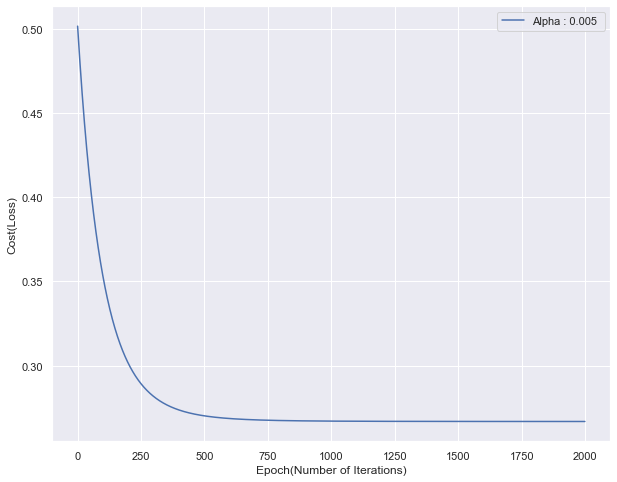

Epoch = 2000
Learning Rate(Alpha) = 0.005
Lowest cost = 0.266921592825454
-------------------------------------------------------------
Cost after 2000 iterations = 0.266921592825454


In [323]:
alpha = 0.005
iterations = 2000
beta = np.zeros((X_train_random8.shape[1]))
(beta_value_new_random8, cost_history_random8) = gradient_descent(X_train_random8, y_train_random8, beta, alpha, iterations)

#COST VS EPOCH PLOT
# Cost/Loss Plot per iteration
plt.plot(cost_history_random8)
plt.xlabel("Epoch(Number of Iterations)")
plt.ylabel("Cost(Loss)")
plt.legend(['Alpha : 0.005 '])
plt.show()
print(f'Epoch = {iterations}')
print(f'Learning Rate(Alpha) = {alpha}')
print(f'Lowest cost = {str(np.min(cost_history_random8))}')
print('-------------------------------------------------------------')
print(f'Cost after {iterations} iterations = {str(cost_history_random8[-1])}')

In [324]:
# Predict Output for Test Data
y_predicted= np.dot(X_test_random8, beta_value_new_random8)
print("Predicted Y:-")
print(y_predicted)

# Evaluation Metrics - Calculation of Mean Absolute Error(MAE), Mean Squared Error (MSE), Root Mean Square Error(RMSE), R2 Score for Training
y_pred_train = np.dot(X_train_random8, beta_value_new_random8)
print("------Training Performance Evaluation-------")
print("Mean Absolute Error(MAE)-",mean_absolute_error(y_train_random8,y_pred_train))
print("Mean Squared Error(MSE)-",mean_squared_error(y_train_random8,y_pred_train))
print("Root Mean Square Error(RMSE)-",np.sqrt(mean_squared_error(y_train_random8,y_pred_train)))
print("R2-",r2_score(y_train_random8,y_pred_train))

# Evaluation Metrics - Calculation of Mean Absolute Error(MAE), Mean Squared Error (MSE), Root Mean Square Error(RMSE), R2 Score for Testing
print("------Testing Performance Evaluation-------")
print("Mean Absolute Error (MAE)-",mean_absolute_error(y_test_random8,y_predicted))
print("Mean Square Error (MSE)-",mean_squared_error(y_test_random8,y_predicted))
print("Root Mean Square Error(RMSE)-",np.sqrt(mean_squared_error(y_test_random8,y_predicted)))
print("R2-",r2_score(y_test_random8,y_predicted))

Predicted Y:-
[-0.56346553 -0.16194403 -0.18838127 ... -0.36859593 -0.78859406
 -0.07324838]
------Training Performance Evaluation-------
Mean Absolute Error(MAE)- 0.5376855052963303
Mean Squared Error(MSE)- 0.533843185650908
Root Mean Square Error(RMSE)- 0.7306457319733743
R2- 0.4703365695437738
------Testing Performance Evaluation-------
Mean Absolute Error (MAE)- 0.54126228764517
Mean Square Error (MSE)- 0.5338533556866067
Root Mean Square Error(RMSE)- 0.7306526915618711
R2- 0.4556334961418059


#4. Running model with 8 features that are best suited

In [325]:
# Suited Variables
#['Intercept','Hour','Dew_point_temperature','Seasons_Winter','Solar_Radiation', 
#'Functioning_Day_Yes','Visibility','Wind_speed','Seasons_Autumn']

# Removing Dew point temperature(°C) as it is having high positive correlation with Temperature(°C) 
# Removing Rainfall(mm) as it is skewed to 0 and based on correlation
# Removing Snowfall (cm) as it is skewed to 0 and based on correlation

# Hour, Wind speed (m/s), Temperature,Humidity, Weekday, Holiday_Holiday, Holiday_NoHoliday,
#'Seasons_Autumn','Seasons_Spring','Seasons_Summer','Seasons_Winter',

# Hour, Wind speed (m/s), Temperature,Humidity, Weekday, Holiday_Holiday, 'Seasons_Summer',
#'Functioning_Day_Yes', Weekday
#X_train.info()
X_train_suited8 =X_train.drop(columns=['Visibility (10m)', 'Dew point temperature(°C)','Solar Radiation (MJ/m2)',
                                        'Rainfall(mm)', 'Snowfall (cm)','Month','Day',
                                        'Functioning Day_No','Seasons_Winter','Seasons_Autumn',
                                         'Seasons_Spring','Holiday_No Holiday'],axis=1)

y_train_suited8 = y_train.drop(columns=['Visibility (10m)', 'Dew point temperature(°C)','Solar Radiation (MJ/m2)',
                                        'Rainfall(mm)', 'Snowfall (cm)','Month','Day',
                                        'Functioning Day_No','Seasons_Winter','Seasons_Autumn',
                                         'Seasons_Spring','Holiday_No Holiday'],axis=1)
X_test_suited8 = X_test.drop(columns=['Visibility (10m)', 'Dew point temperature(°C)','Solar Radiation (MJ/m2)',
                                        'Rainfall(mm)', 'Snowfall (cm)','Month','Day',
                                        'Functioning Day_No','Seasons_Winter','Seasons_Autumn',
                                         'Seasons_Spring','Holiday_No Holiday'],axis=1)

y_test_suited8 =y_test.drop(columns=['Visibility (10m)', 'Dew point temperature(°C)','Solar Radiation (MJ/m2)',
                                        'Rainfall(mm)', 'Snowfall (cm)','Month','Day',
                                        'Functioning Day_No','Seasons_Winter','Seasons_Autumn',
                                         'Seasons_Spring','Holiday_No Holiday'],axis=1)

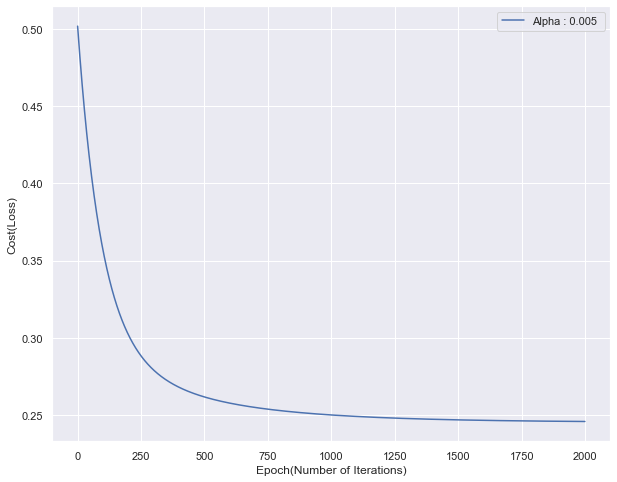

Epoch = 2000
Learning Rate(Alpha) = 0.005
Lowest cost = 0.24585977289382763
-------------------------------------------------------------
Cost after 2000 iterations = 0.24585977289382763


In [326]:
alpha = 0.005
iterations = 2000
beta = np.zeros((X_train_suited8.shape[1]))
(beta_value_new_suited8, cost_history_suited8) = gradient_descent(X_train_suited8, y_train_suited8, beta, alpha, iterations)

#COST VS EPOCH PLOT
# Cost/Loss Plot per iteration
plt.plot(cost_history_suited8)
plt.xlabel("Epoch(Number of Iterations)")
plt.ylabel("Cost(Loss)")
plt.legend(['Alpha : 0.005 '])
plt.show()
print(f'Epoch = {iterations}')
print(f'Learning Rate(Alpha) = {alpha}')
print(f'Lowest cost = {str(np.min(cost_history_suited8))}')
print('-------------------------------------------------------------')
print(f'Cost after {iterations} iterations = {str(cost_history_suited8[-1])}')

In [327]:
# Predict Output for Test Data
y_predicted= np.dot(X_test_suited8, beta_value_new_suited8)
print("Predicted Y:-")
print(y_predicted)

# Evaluation Metrics - Calculation of Mean Absolute Error(MAE), Mean Squared Error (MSE), Root Mean Square Error(RMSE), R2 Score for Training
y_pred_train = np.dot(X_train_suited8, beta_value_new_suited8)
print("------Training Performance Evaluation-------")
print("Mean Absolute Error(MAE)-",mean_absolute_error(y_train_suited8,y_pred_train))
print("Mean Squared Error(MSE)-",mean_squared_error(y_train_suited8,y_pred_train))
print("Root Mean Square Error(RMSE)-",np.sqrt(mean_squared_error(y_train_suited8,y_pred_train)))
print("R2-",r2_score(y_train_suited8,y_pred_train))

# Evaluation Metrics - Calculation of Mean Absolute Error(MAE), Mean Squared Error (MSE), Root Mean Square Error(RMSE), R2 Score for Testing
print("------Testing Performance Evaluation-------")
print("Mean Absolute Error (MAE)-",mean_absolute_error(y_test_suited8,y_predicted))
print("Mean Square Error (MSE)-",mean_squared_error(y_test_suited8,y_predicted))
print("Root Mean Square Error(RMSE)-",np.sqrt(mean_squared_error(y_test_suited8,y_predicted)))
print("R2-",r2_score(y_test_suited8,y_predicted))

Predicted Y:-
[-0.55059853 -0.11267805 -0.20718891 ... -0.14449744 -0.75927202
 -0.11720635]
------Training Performance Evaluation-------
Mean Absolute Error(MAE)- 0.5227789935233306
Mean Squared Error(MSE)- 0.49171954578765525
Root Mean Square Error(RMSE)- 0.7012271713130169
R2- 0.5121304000036853
------Testing Performance Evaluation-------
Mean Absolute Error (MAE)- 0.5237861503822276
Mean Square Error (MSE)- 0.48691072698641774
Root Mean Square Error(RMSE)- 0.6977898874205742
R2- 0.5035005637461096


In [328]:
beta_value_new_suited8

intercept              0.008269
Hour                   0.291928
Temperature(°C)        0.572967
Humidity(%)           -0.213395
Wind speed (m/s)      -0.016648
Weekday               -0.026300
Seasons_Summer        -0.064016
Holiday_Holiday       -0.057653
Functioning Day_Yes    0.231105
dtype: float64

In [329]:
beta_value_new_random8

intercept                    0.010175
Hour                         0.302130
Temperature(°C)              0.355706
Humidity(%)                 -0.271586
Dew point temperature(°C)    0.207458
Rainfall(mm)                -0.106187
Snowfall (cm)                0.000675
Holiday_Holiday             -0.032807
Holiday_No Holiday           0.032807
dtype: float64

In [330]:
beta_value_new

intercept                    0.007192
Hour                         0.308761
Temperature(°C)              0.293184
Humidity(%)                 -0.265913
Wind speed (m/s)             0.024252
Visibility (10m)             0.046082
Dew point temperature(°C)    0.156765
Solar Radiation (MJ/m2)     -0.067071
Rainfall(mm)                -0.105022
Snowfall (cm)                0.012802
Month                        0.013267
Day                          0.004077
Weekday                     -0.026621
Seasons_Autumn               0.101035
Seasons_Spring               0.029909
Seasons_Summer               0.024818
Seasons_Winter              -0.156541
Holiday_Holiday             -0.022317
Holiday_No Holiday           0.022317
Functioning Day_No          -0.129734
Functioning Day_Yes          0.129734
dtype: float64